In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path="../datasets/housing/housing.csv"
house_data= pd.read_csv(path)

In [3]:
house_data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [20]:
house_data["ocean_proximity"].value_counts()

-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-115.72      1
-123.68      1
-116.09      1
-123.72      1
-116.69      1
Name: longitude, Length: 844, dtype: int64

In [50]:
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.870553,419.266592,1.0000,297.0000,438.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,1.464729,0.854226,0.0000,1.0000,1.0000,2.00000,4.0000


In [29]:
house_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
house_data["total_bedrooms"]= house_data["total_bedrooms"].fillna(value=house_data["total_bedrooms"].mean())

In [41]:
house_data["ocean_proximity"]= pd.factorize(house_data["ocean_proximity"])[0]

In [42]:
house_data["ocean_proximity"]

0        0
1        0
2        0
3        0
4        0
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: ocean_proximity, Length: 20640, dtype: int64

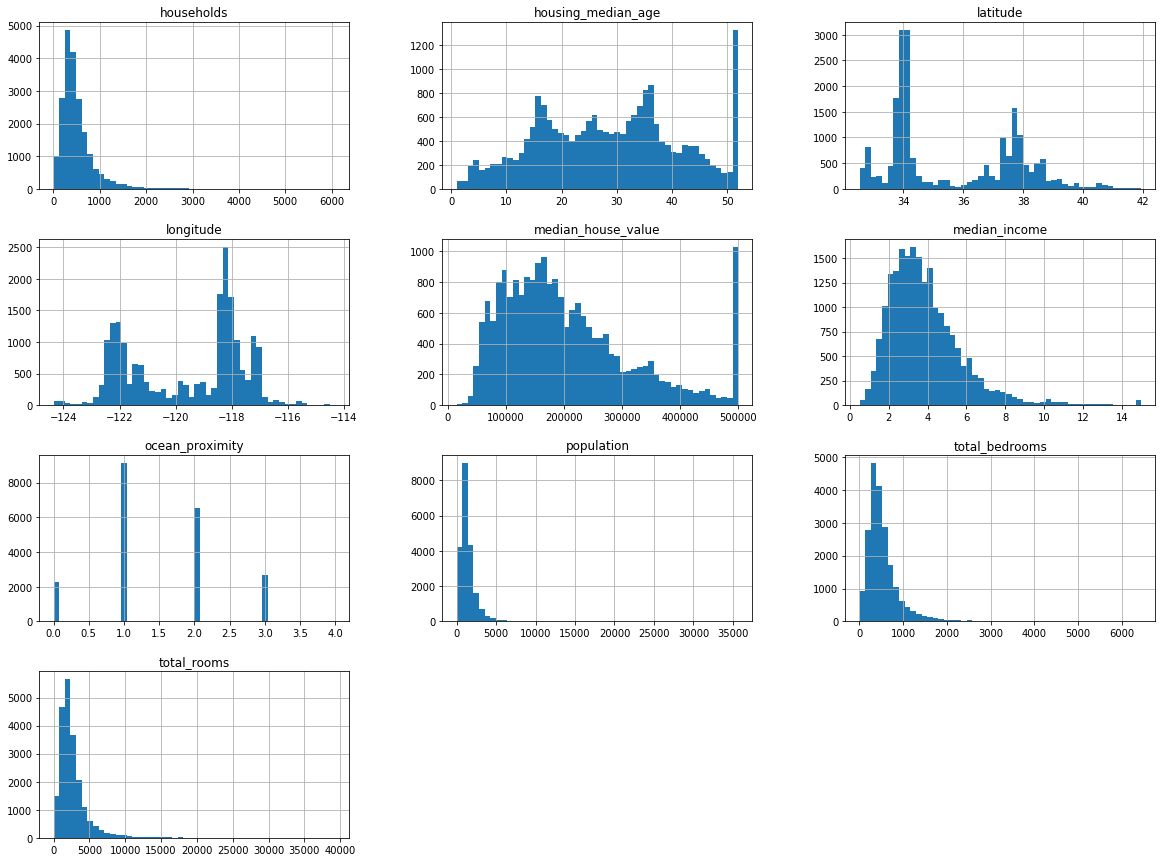

In [62]:
house_data.hist(bins=50,figsize=[20,15])
plt.show()

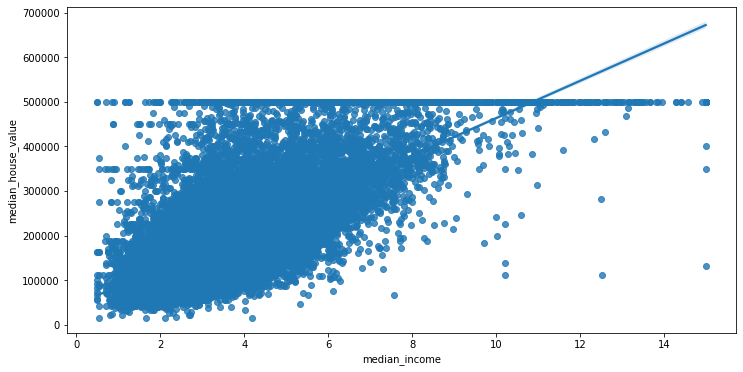

In [67]:
plt.figure(figsize=[12,6])
sns.regplot(x=house_data["median_income"],y=house_data["median_house_value"])

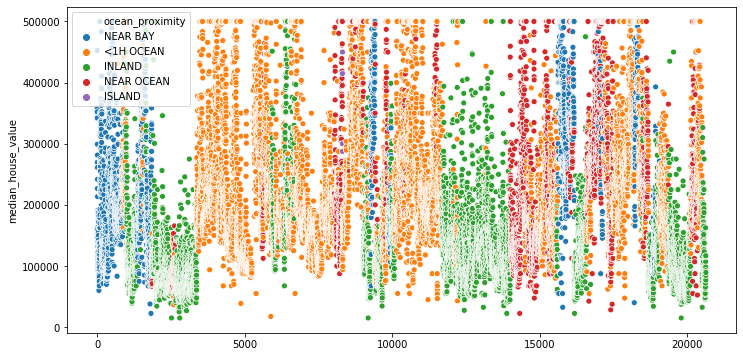

In [15]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=house_data.index,y=house_data["median_house_value"],hue=house_data["ocean_proximity"])

In [68]:
house_data["median_income"]=np.ceil(house_data["median_income"]/1.5)

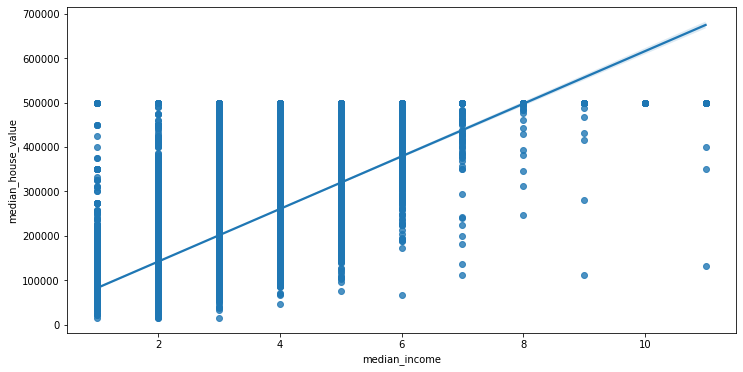

In [69]:
plt.figure(figsize=[12,6])
sns.regplot(x=house_data["median_income"],y=house_data["median_house_value"])

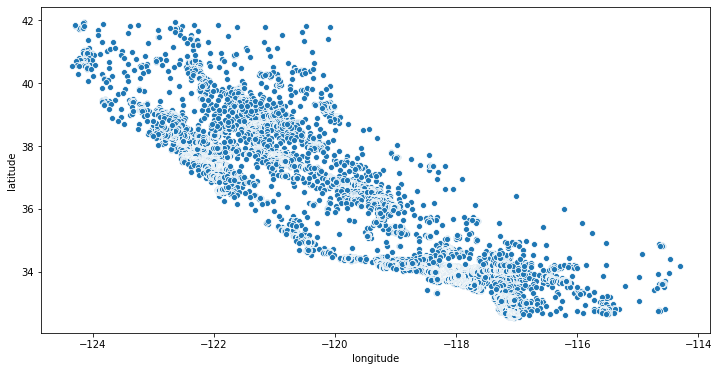

In [79]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=house_data["longitude"],y=house_data["latitude"])

In [70]:
y=house_data["median_house_value"]
x=house_data.drop("median_house_value",axis=1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [72]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error
msr=mean_squared_error(y_test,pred)

In [74]:
msr

4821150023.064147